### Import Libraries

In [1]:
library(tidyr)
library(dplyr)
library(zoo)

library(gridExtra)
library(ggplot2) # for creating visualizations
library(gplots)
library(lubridate)
library(corrplot)

library(testthat)
library(leaps)
library(car)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

corrplot 0.92 loaded

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



### Load the "Football Waste" dataset, and describe the variables.

In [2]:
football_data = read.csv("STATS 2 Project Data.csv", sep = ",")

In [3]:
str(football_data)

'data.frame':	77 obs. of  11 variables:
 $ Year_Game               : Factor w/ 77 levels "2009 Game 1",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Cardboard_lbs           : num  755 1059 918 1111 747 ...
 $ Cans_Bottles_lbs        : num  4893 4760 5123 2986 3798 ...
 $ Compost_lbs             : int  5126 5633 5322 4061 4945 4925 5370 5868 5048 5393 ...
 $ Paper_lbs               : int  0 0 0 433 122 45 71 167 168 136 ...
 $ Fryer_Grease            : num  627 627 627 627 627 627 127 524 288 289 ...
 $ Wrap_it_Up_food_donation: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pallets                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Specials                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Attendance              : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Trash_lbs               : num  3672 2093 3279 2730 2677 ...


In [4]:
colnames <- colnames(football_data)
colnames

[1] "Year_Game"                "Cardboard_lbs"           
 [3] "Cans_Bottles_lbs"         "Compost_lbs"             
 [5] "Paper_lbs"                "Fryer_Grease"            
 [7] "Wrap_it_Up_food_donation" "Pallets"                 
 [9] "Specials"                 "Attendance"              
[11] "Trash_lbs"

### Pre-processing

Let's breakdown the Year_Game column into Year & Game

In [5]:
football_data <- transform(football_data, Year = sub("^(\\d+).*", "\\1", Year_Game), Game = sub("^\\d+ (.*)", "\\1", Year_Game))

In [6]:
football_data <- football_data %>% select(-Year_Game)

In [7]:
football_data <- football_data %>%
  select(Year, Game, everything())

In [8]:
#football_data$Diverted_Material_lbs <- (football_data$Cardboard_lbs + football_data$Cans_Bottles_lbs + football_data$Compost_lbs + football_data$Fryer_Grease + football_data$Wrap_it_Up_food_donation + football_data$Pallets + football_data$Specials)
football_data$Diversion_Rate <- 100 * (football_data$Cardboard_lbs + football_data$Cans_Bottles_lbs + football_data$Compost_lbs + football_data$Fryer_Grease + football_data$Wrap_it_Up_food_donation + football_data$Pallets + football_data$Specials) / (football_data$Cardboard_lbs + football_data$Cans_Bottles_lbs + football_data$Compost_lbs + football_data$Fryer_Grease + football_data$Wrap_it_Up_food_donation + football_data$Pallets + football_data$Specials + football_data$Trash_lbs)

In [9]:
str(football_data)

'data.frame':	77 obs. of  13 variables:
 $ Year                    : Factor w/ 13 levels "2009","2010",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Game                    : Factor w/ 6 levels "Game 1","Game 2",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ Cardboard_lbs           : num  755 1059 918 1111 747 ...
 $ Cans_Bottles_lbs        : num  4893 4760 5123 2986 3798 ...
 $ Compost_lbs             : int  5126 5633 5322 4061 4945 4925 5370 5868 5048 5393 ...
 $ Paper_lbs               : int  0 0 0 433 122 45 71 167 168 136 ...
 $ Fryer_Grease            : num  627 627 627 627 627 627 127 524 288 289 ...
 $ Wrap_it_Up_food_donation: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pallets                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Specials                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Attendance              : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Trash_lbs               : num  3672 2093 3279 2730 2677 ...
 $ Diversion_Rate          : num  75.6 85.2 78.5 76.3 79.1 ...


In [10]:
head(football_data)

Year,Game,Cardboard_lbs,Cans_Bottles_lbs,Compost_lbs,Paper_lbs,Fryer_Grease,Wrap_it_Up_food_donation,Pallets,Specials,Attendance,Trash_lbs,Diversion_Rate
2009,Game 1,755,4893,5126,0,627,0,0,0,NA,3672,75.63856
2009,Game 2,1059,4760,5633,0,627,0,0,0,NA,2093,85.23144
2009,Game 3,918,5123,5322,0,627,0,0,0,NA,3279,78.52512
2009,Game 4,1111,2986,4061,433,627,0,0,0,NA,2730,76.29179
2009,Game 5,747,3798,4945,122,627,0,0,0,NA,2677,79.07613
2009,Game 6,850,4138,4925,45,627,0,0,0,NA,3099,77.27839


From above, we can observe that there NA values in Attendace variable. We do not have data for those matches where we have NA as value. Hence while analysing, we will consider the subset of the data set where attendace value is present in order to see whether there is any co-rrelation between Attendance and Waste generation.

In [11]:
sum(is.na(football_data))

[1] 47

Warning message:
“Removed 47 rows containing non-finite values (stat_bin).”Warning message:
“Removed 47 rows containing non-finite values (stat_density).”

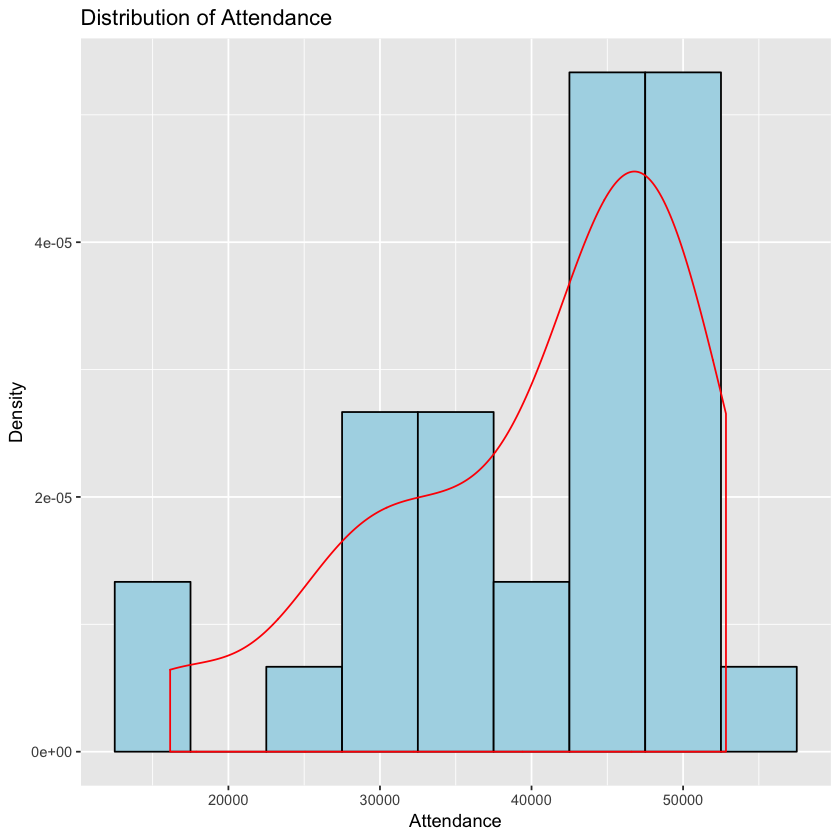

In [12]:
library(ggplot2)

# Create a histogram with density plot
ggplot(football_data, aes(x = Attendance)) +
  geom_histogram(aes(y = ..density..), binwidth = 5000, fill = "lightblue", color = "black") +
  geom_density(color = "red") +
  labs(title = "Distribution of Attendance",
       x = "Attendance",
       y = "Density")


In [13]:


# Replace null values with median
football_data$Attendance <- na.aggregate(football_data$Attendance, FUN = median)


In [14]:
str(football_data)

'data.frame':	77 obs. of  13 variables:
 $ Year                    : Factor w/ 13 levels "2009","2010",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Game                    : Factor w/ 6 levels "Game 1","Game 2",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ Cardboard_lbs           : num  755 1059 918 1111 747 ...
 $ Cans_Bottles_lbs        : num  4893 4760 5123 2986 3798 ...
 $ Compost_lbs             : int  5126 5633 5322 4061 4945 4925 5370 5868 5048 5393 ...
 $ Paper_lbs               : int  0 0 0 433 122 45 71 167 168 136 ...
 $ Fryer_Grease            : num  627 627 627 627 627 627 127 524 288 289 ...
 $ Wrap_it_Up_food_donation: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pallets                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Specials                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Attendance              : num  44236 44236 44236 44236 44236 ...
 $ Trash_lbs               : num  3672 2093 3279 2730 2677 ...
 $ Diversion_Rate          : num  75.6 85.2 78.5 76.3 79.1 ...


In [15]:
summary(football_data)

      Year        Game    Cardboard_lbs  Cans_Bottles_lbs  Compost_lbs   
 2009   : 6   Game 1:13   Min.   : 200   Min.   : 998.1   Min.   : 1294  
 2010   : 6   Game 2:13   1st Qu.: 663   1st Qu.:1981.0   1st Qu.: 5126  
 2012   : 6   Game 3:13   Median : 960   Median :2659.0   Median : 5845  
 2013   : 6   Game 4:13   Mean   :1150   Mean   :2801.2   Mean   : 6413  
 2014   : 6   Game 5:13   3rd Qu.:1180   3rd Qu.:3477.0   3rd Qu.: 7840  
 2015   : 6   Game 6:12   Max.   :3342   Max.   :7799.0   Max.   :13572  
 (Other):41                                                              
   Paper_lbs      Fryer_Grease Wrap_it_Up_food_donation    Pallets      
 Min.   :  0.0   Min.   : 70   Min.   :  0.00           Min.   :   0.0  
 1st Qu.:152.0   1st Qu.: 82   1st Qu.:  0.00           1st Qu.:   0.0  
 Median :300.0   Median :250   Median :  0.00           Median : 176.0  
 Mean   :291.6   Mean   :258   Mean   : 55.38           Mean   : 359.9  
 3rd Qu.:405.0   3rd Qu.:330   3rd Qu.:120.

### Exploratory Data Analysis

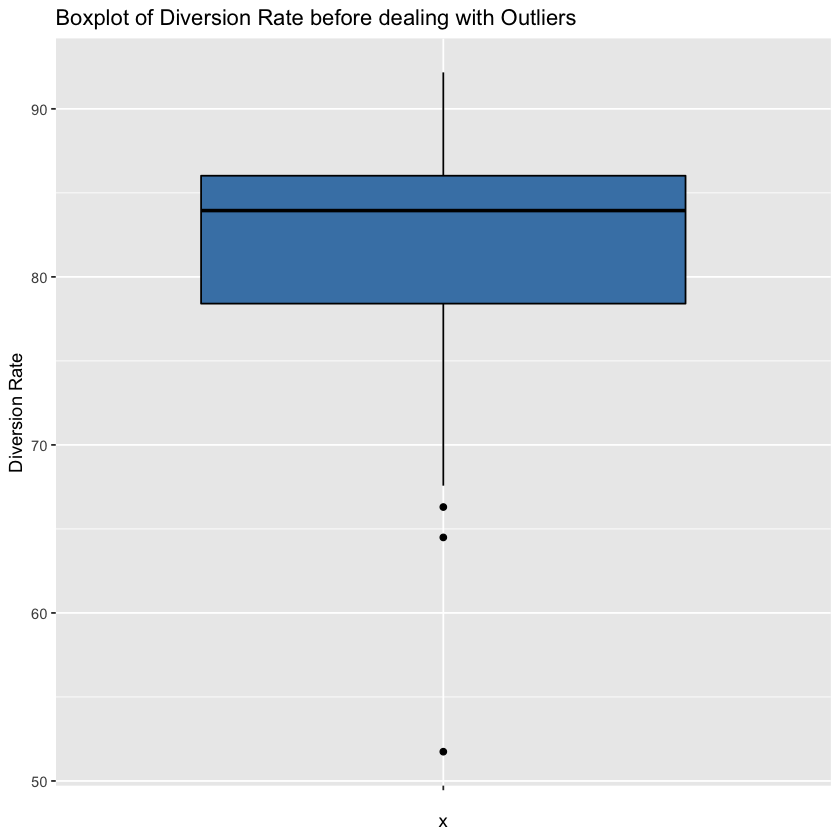

In [16]:
ggplot(football_data, aes(x = "", y = Diversion_Rate)) +
  geom_boxplot(fill = "steelblue", color = "black") +
  labs(y = "Diversion Rate", title = "Boxplot of Diversion Rate before dealing with Outliers")

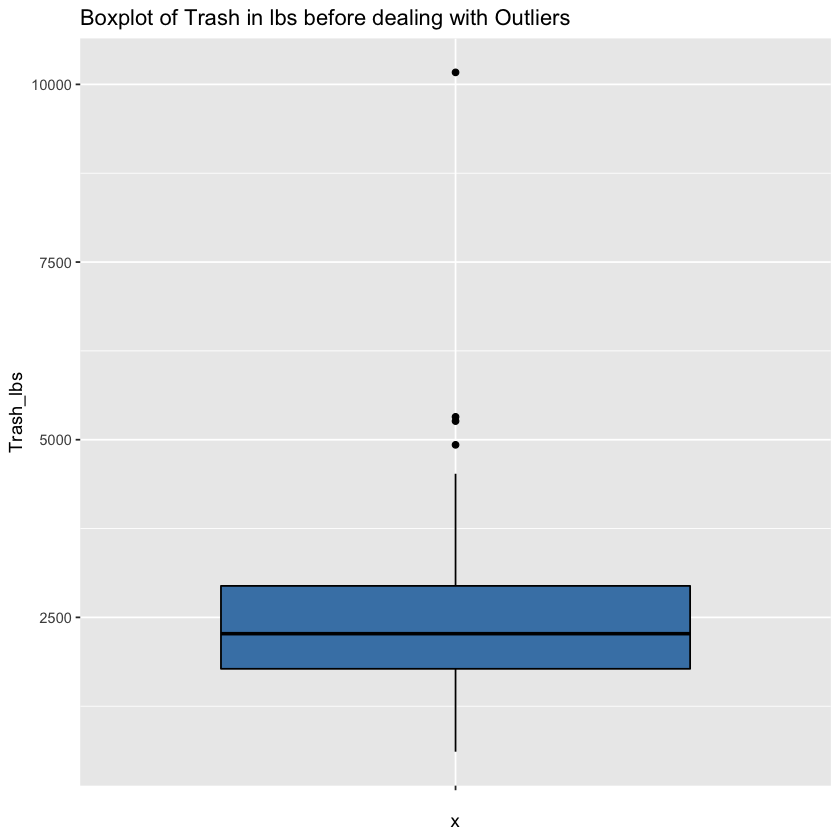

In [17]:
ggplot(football_data, aes(x = "", y = Trash_lbs)) +
  geom_boxplot(fill = "steelblue", color = "black") +
  labs(y = "Trash_lbs", title = "Boxplot of Trash in lbs before dealing with Outliers")

In [18]:
# Calculate the lower and upper winsorization limits at the 5th and 95th percentiles
lower_limit <- quantile(football_data$Diversion_Rate, probs = 0.05)
upper_limit <- quantile(football_data$Diversion_Rate, probs = 0.95)

# Replace values below the lower limit with the lower limit and values above the upper limit with the upper limit
football_data$Diversion_Rate[football_data$Diversion_Rate < lower_limit] <- lower_limit
football_data$Diversion_Rate[football_data$Diversion_Rate > upper_limit] <- upper_limit

# Repeat the same process for the 'Trash_lbs' column
lower_limit <- quantile(football_data$Trash_lbs, probs = 0.05)
upper_limit <- quantile(football_data$Trash_lbs, probs = 0.95)
football_data$Trash_lbs[football_data$Trash_lbs < lower_limit] <- lower_limit
football_data$Trash_lbs[football_data$Trash_lbs > upper_limit] <- upper_limit

# The outliers in the Diversion_Rate and Trash_lbs columns have been replaced with the winsorized limits



In [19]:
str(football_data)

'data.frame':	77 obs. of  13 variables:
 $ Year                    : Factor w/ 13 levels "2009","2010",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Game                    : Factor w/ 6 levels "Game 1","Game 2",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ Cardboard_lbs           : num  755 1059 918 1111 747 ...
 $ Cans_Bottles_lbs        : num  4893 4760 5123 2986 3798 ...
 $ Compost_lbs             : int  5126 5633 5322 4061 4945 4925 5370 5868 5048 5393 ...
 $ Paper_lbs               : int  0 0 0 433 122 45 71 167 168 136 ...
 $ Fryer_Grease            : num  627 627 627 627 627 627 127 524 288 289 ...
 $ Wrap_it_Up_food_donation: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pallets                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Specials                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Attendance              : num  44236 44236 44236 44236 44236 ...
 $ Trash_lbs               : num  3672 2093 3279 2730 2677 ...
 $ Diversion_Rate          : num  75.6 85.2 78.5 76.3 79.1 ...


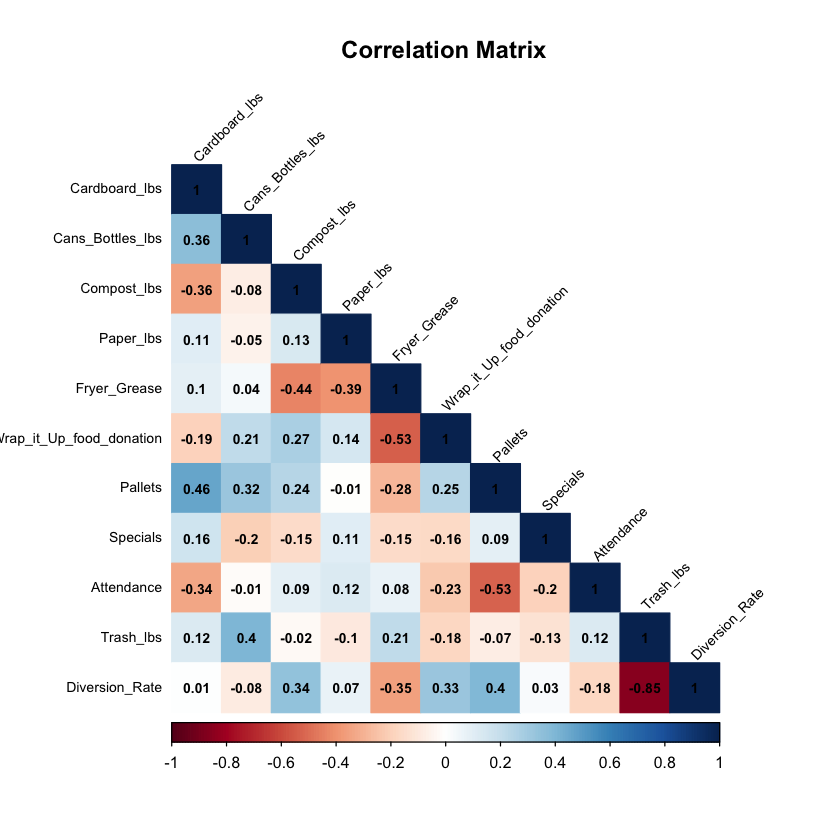

In [20]:
# Compute correlation matrix
cor_matrix <- cor(football_data[, c("Cardboard_lbs", "Cans_Bottles_lbs", "Compost_lbs", "Paper_lbs", "Fryer_Grease", "Wrap_it_Up_food_donation", "Pallets", "Specials", "Attendance", "Trash_lbs", "Diversion_Rate")])


# Plot the correlogram
corrplot(cor_matrix, method = "color", type = "lower", 
         tl.col = "black", tl.srt = 45, tl.cex = 0.7,
         addCoef.col = "black", number.cex = 0.7)

# Add a title
title("Correlation Matrix")


- Diversion_Rate is positively correlated with Compost_lbs, Wrap_it_Up_food_donation & Pallets.
- And even Pallets variable is positively correlated with Cardboard_lbs, Cans_Bottles_lbs, Compost_lbs & Wrap_it_Up_food_donation.
- There are many other variables which are positively correlated to each other like  Wrap_it_Up_food_donation & Compost_lbs, Trash_lbs & Cans_Bottles_lbs. 

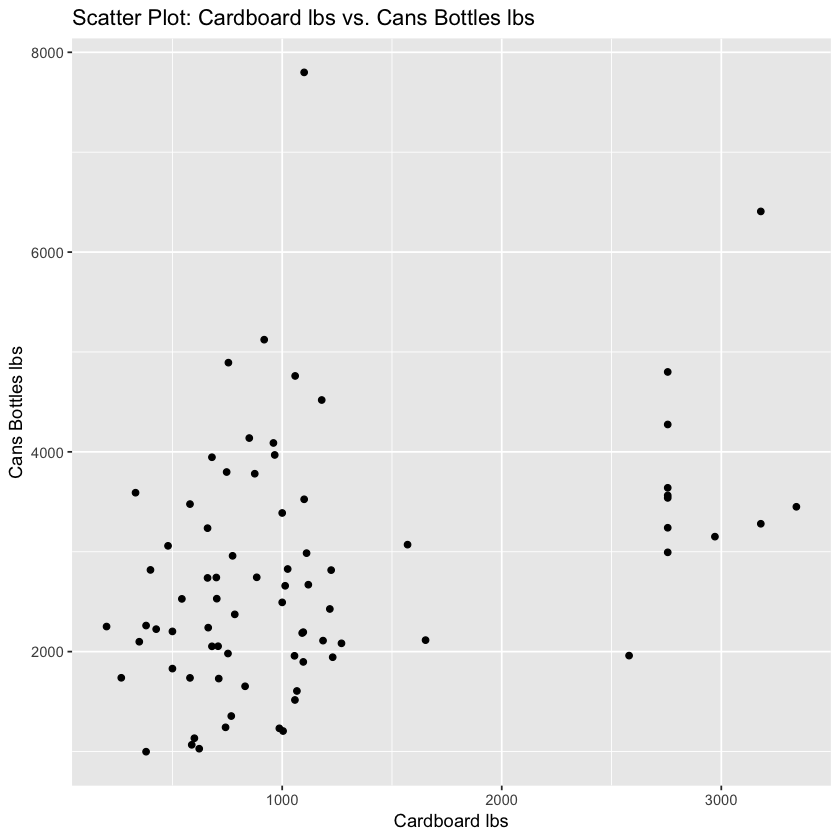

In [21]:
# Scatter plot
ggplot(data = football_data, aes(x = Cardboard_lbs, y = Cans_Bottles_lbs)) +
  geom_point() +
  labs(x = "Cardboard lbs", y = "Cans Bottles lbs") +
  ggtitle("Scatter Plot: Cardboard lbs vs. Cans Bottles lbs")


The above scatter plot reflects that there are some extreme values present which can be assumed as outliers but futher analysis is required. And even the relationship between Cardboard & Cans_Bottles seems to be non-linear

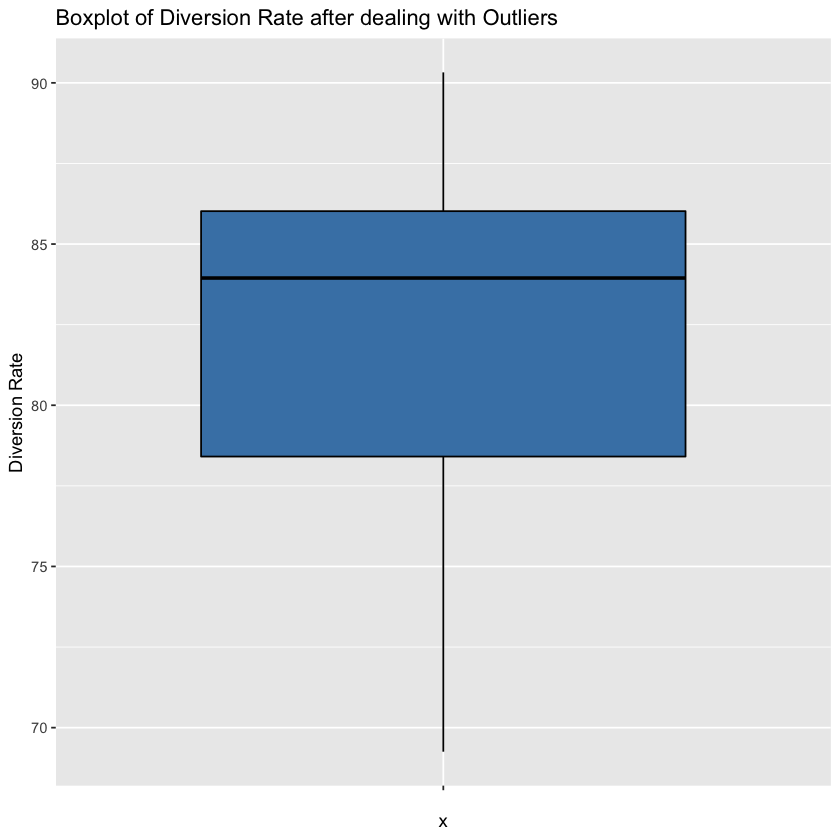

In [22]:
ggplot(football_data, aes(x = "", y = Diversion_Rate)) +
  geom_boxplot(fill = "steelblue", color = "black") +
  labs(y = "Diversion Rate", title = "Boxplot of Diversion Rate after dealing with Outliers")

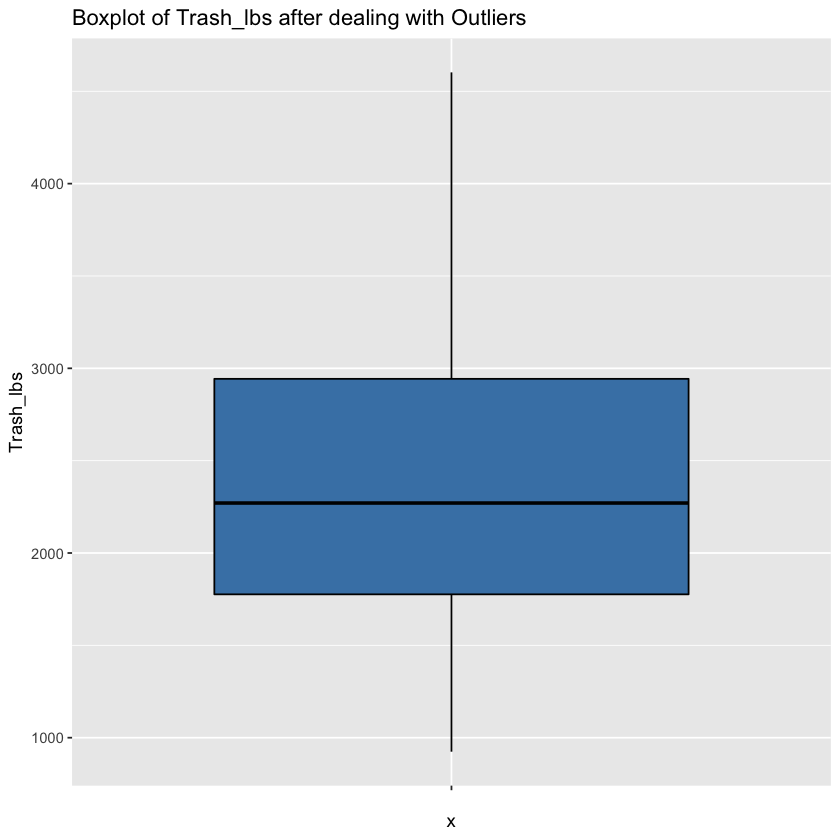

In [23]:
ggplot(football_data, aes(x = "", y = Trash_lbs)) +
  geom_boxplot(fill = "steelblue", color = "black") +
  labs(y = "Trash_lbs", title = "Boxplot of Trash_lbs after dealing with Outliers")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


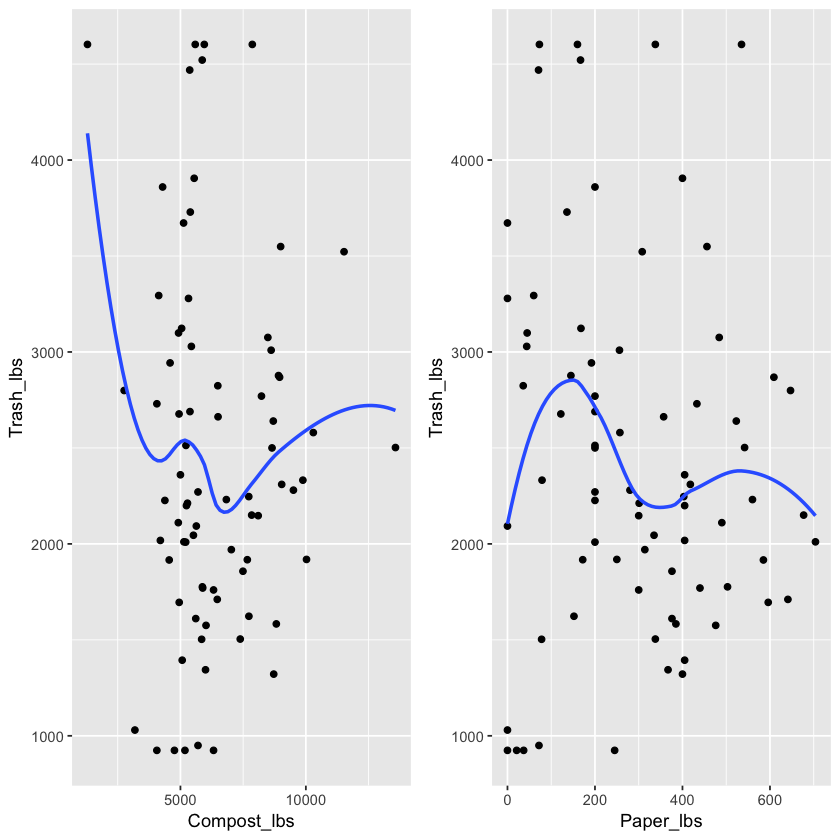

In [24]:
#Let us find any relationship between Trash and any other variables such as Compost, Paper to see
# whether there is any linear relationship


p = ggplot(data = football_data) 
p1 = p + geom_point(mapping = aes(x = Compost_lbs , y = Trash_lbs)) + geom_smooth(se = FALSE, mapping = aes(x = Compost_lbs , y = Trash_lbs)) 
p2 = p + geom_point(mapping = aes(x = Paper_lbs, y = Trash_lbs)) + geom_smooth(se = FALSE, mapping = aes(x = Paper_lbs , y = Trash_lbs)) 
grid.arrange(p1,p2, nrow = 1)

From the above plots,

1. We can notice, as more amount of compost is diverted, there is a significant decrease in the trash. And there are few peculiar cases where trash is increased even though compost is diverted. This may be due to compost contamination which leads to complete refusal of compost to trash.

2. Paper doesn't seem to have linear relationship with trash as the values are much scattered

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


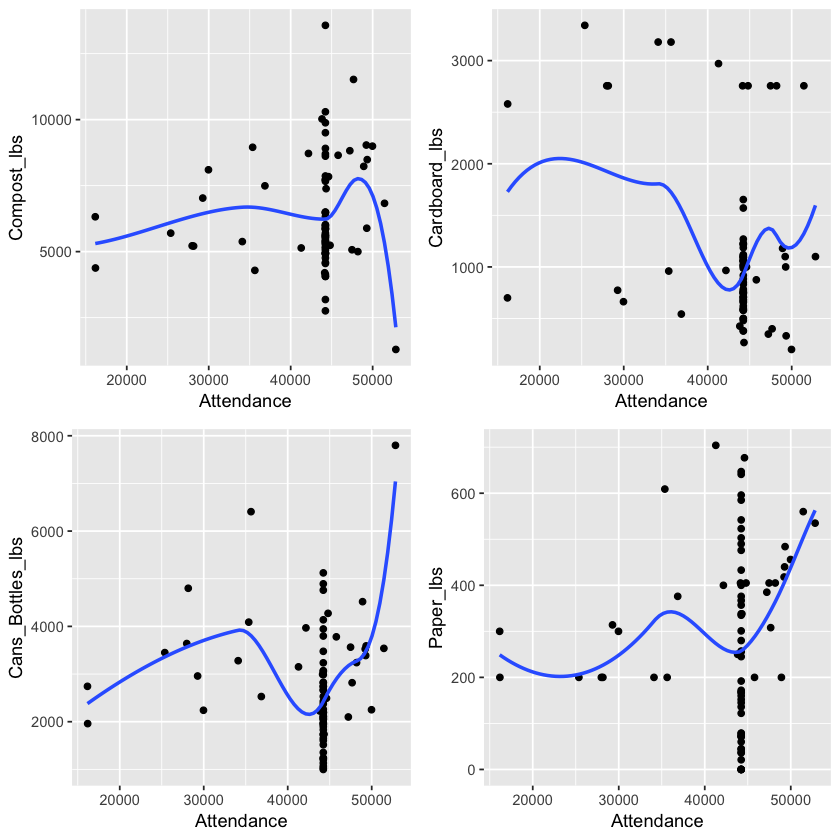

In [25]:
#Let us find any relationship between Attendance and any other variables such as Compost, Cans and Bottles to see
# whether there is any linear relationship


p = ggplot(data = football_data) 
p1 = p + geom_point(mapping = aes(x = Attendance , y = Compost_lbs)) + geom_smooth(se = FALSE, mapping = aes(x = Attendance , y = Compost_lbs)) 
p2 = p + geom_point(mapping = aes(x = Attendance, y = Cardboard_lbs)) + geom_smooth(se = FALSE, mapping = aes(x = Attendance , y = Cardboard_lbs))
p3 = p + geom_point(mapping = aes(x = Attendance, y = Cans_Bottles_lbs)) + geom_smooth(se = FALSE, mapping = aes(x = Attendance , y = Cans_Bottles_lbs))
p4 = p + geom_point(mapping = aes(x = Attendance, y = Paper_lbs)) + geom_smooth(se = FALSE, mapping = aes(x = Attendance , y = Paper_lbs))
grid.arrange(p1,p2,p3,p4, nrow = 2)

1. We can observe a common trend of increase in cans_bottles & paper usage when there is a high footfall for the matches. This can happen due to special matches like Home coming match or a match in Thanks giving week.
2. And there is a high possibility of compost contamination due to this high attendance.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


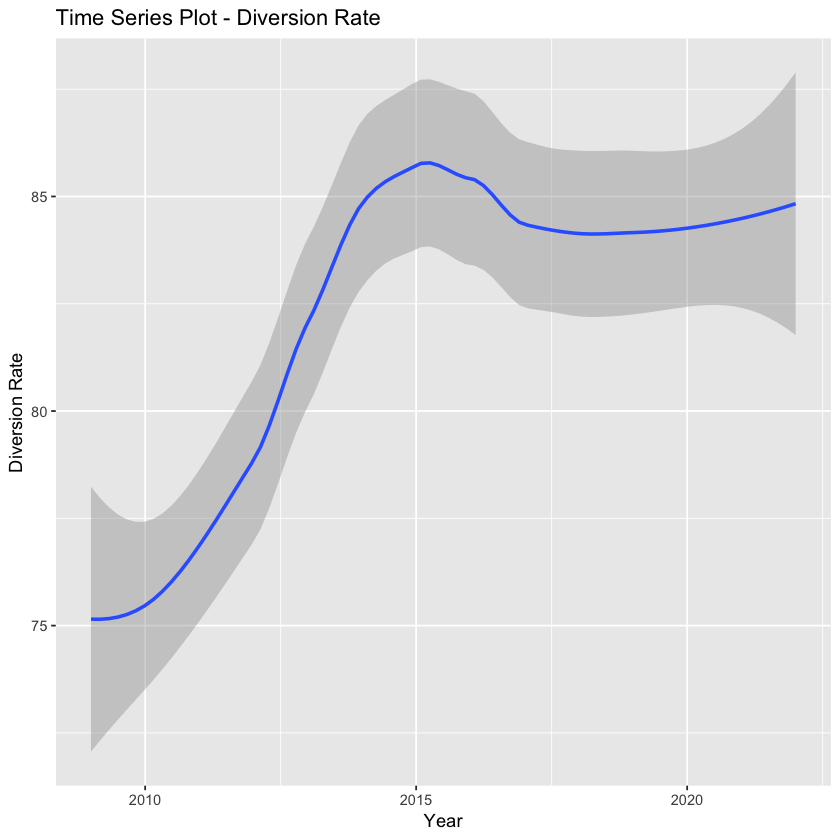

In [26]:


# Convert "Year" to Date format
football_data$Year <- as.Date(paste0(football_data$Year, "-01-01"))

# Plotting the time series
ggplot(football_data, aes(x = Year, y = Diversion_Rate)) +
  geom_smooth() +
  labs(title = "Time Series Plot - Diversion Rate",
       x = "Year",
       y = "Diversion Rate")


Over the period of time, Ralphie's Green Stampede & CU Environmental Center Zero Waste Program managed to divert a lot of materials from the trash and trend was increasing until the entire world got hit by pandemic. And slowly, again they are doing a great job to improve the diversion rate. 

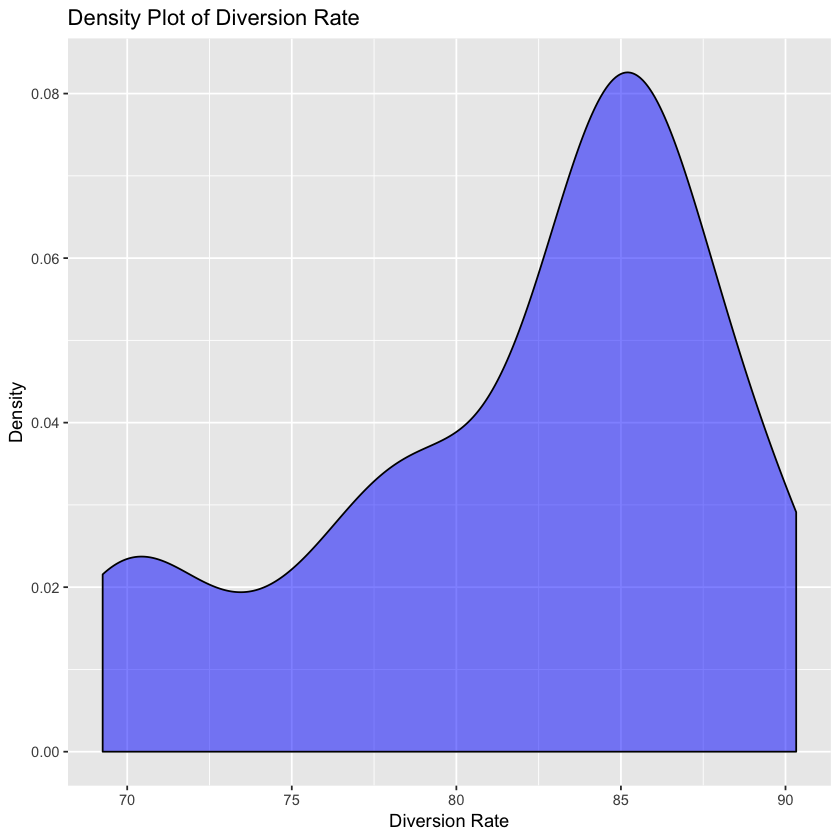

In [27]:
# Plot density of Diversion_Rate
ggplot(football_data, aes(x = Diversion_Rate)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(x = "Diversion Rate", y = "Density") +
  ggtitle("Density Plot of Diversion Rate")

Most of the times, CU Zero Waste program managed most of the times to have an average of 80-85% of diversion rate thus by reducing the landfill.

### Modeling

In [28]:
# Subset the dataset to include only numerical variables
num_data <- football_data %>%
  select_if(is.numeric)


head(num_data)

Cardboard_lbs,Cans_Bottles_lbs,Compost_lbs,Paper_lbs,Fryer_Grease,Wrap_it_Up_food_donation,Pallets,Specials,Attendance,Trash_lbs,Diversion_Rate
755,4893,5126,0,627,0,0,0,44235.5,3672,75.63856
1059,4760,5633,0,627,0,0,0,44235.5,2093,85.23144
918,5123,5322,0,627,0,0,0,44235.5,3279,78.52512
1111,2986,4061,433,627,0,0,0,44235.5,2730,76.29179
747,3798,4945,122,627,0,0,0,44235.5,2677,79.07613
850,4138,4925,45,627,0,0,0,44235.5,3099,77.27839


In [29]:
#training and test set
set.seed(11111)
n = floor(0.8 * nrow(num_data)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(num_data)), size = n) #randomly sample indicies to be included in the training set

train = num_data[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = num_data[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")  #check the dimensions
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.") 

There are 61 rows and 11 columns in the training set. There are 16 rows and 11 columns in the testing set.

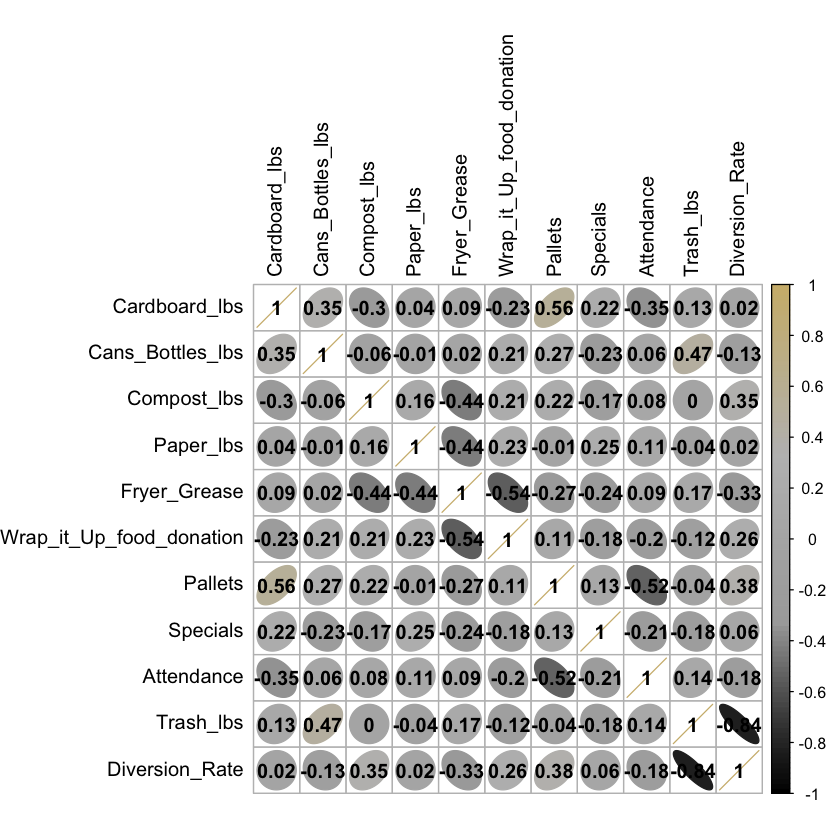

In [30]:
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(train[]), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")

#### Analysis on Diversion Rate

In [31]:
lmod_div = lm(Diversion_Rate ~ ., data = train)

summary(lmod_div)


Call:
lm(formula = Diversion_Rate ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3315 -0.6050 -0.0135  0.6877  2.6116 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               8.381e+01  1.830e+00  45.811  < 2e-16 ***
Cardboard_lbs             1.033e-03  3.493e-04   2.958  0.00472 ** 
Cans_Bottles_lbs          1.199e-03  1.885e-04   6.359 6.04e-08 ***
Compost_lbs               1.090e-03  1.033e-04  10.550 2.58e-14 ***
Paper_lbs                -3.666e-03  1.111e-03  -3.300  0.00179 ** 
Fryer_Grease              6.446e-04  1.466e-03   0.440  0.66208    
Wrap_it_Up_food_donation  5.146e-03  3.137e-03   1.641  0.10713    
Pallets                   1.665e-03  5.974e-04   2.787  0.00750 ** 
Specials                  2.985e-03  4.420e-03   0.675  0.50262    
Attendance                4.061e-05  3.252e-05   1.249  0.21753    
Trash_lbs                -6.248e-03  2.106e-04 -29.662  < 2e-16 ***
---
Signif. codes:  0

- This model seem to explain much variability in the response. Note that the  𝑅2  for the model is  ≈ 96.84% . 
- Few of the predictors are statistically significant like Cans_Bottles_lbs, Compost_lbs, Pallets, Trash_lbs, Paper_lbs & Cardboard_lbs (to some extent). 
- This suggests that these variables are helping explain variability of the data.

In [32]:
#mspe
ystar = predict(lmod_div, test); 
mspe1 = with(test, mean((Diversion_Rate - ystar)^2))
mspe1

[1] 1.96048

Assuming $\alpha_{crit} = 0.15$, let's perform backward selection using update().

Let's start with eliminating "Fryer_Grease".

In [33]:
lmod_div = update(lmod_div, . ~ . - Fryer_Grease)
summary(lmod_div)


Call:
lm(formula = Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + 
    Compost_lbs + Paper_lbs + Wrap_it_Up_food_donation + Pallets + 
    Specials + Attendance + Trash_lbs, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3303 -0.6003 -0.0323  0.7086  2.7072 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               8.426e+01  1.507e+00  55.928  < 2e-16 ***
Cardboard_lbs             1.031e-03  3.465e-04   2.976 0.004459 ** 
Cans_Bottles_lbs          1.208e-03  1.857e-04   6.505 3.29e-08 ***
Compost_lbs               1.075e-03  9.636e-05  11.153 2.74e-15 ***
Paper_lbs                -3.777e-03  1.073e-03  -3.520 0.000918 ***
Wrap_it_Up_food_donation  4.409e-03  2.630e-03   1.676 0.099776 .  
Pallets                   1.612e-03  5.806e-04   2.777 0.007657 ** 
Specials                  2.208e-03  4.019e-03   0.549 0.585213    
Attendance                3.802e-05  3.173e-05   1.198 0.236303    
Trash_lbs        

In [34]:
#mspe
ystar = predict(lmod_div, test); 
mspe2 = with(test, mean((Diversion_Rate - ystar)^2))
mspe2

[1] 1.852959

Now let's eliminate "Specials"

In [35]:
lmod_div = update(lmod_div, . ~ . - Specials)
summary(lmod_div)


Call:
lm(formula = Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + 
    Compost_lbs + Paper_lbs + Wrap_it_Up_food_donation + Pallets + 
    Attendance + Trash_lbs, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3555 -0.6404 -0.0184  0.7199  2.6931 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               8.447e+01  1.447e+00  58.373  < 2e-16 ***
Cardboard_lbs             1.037e-03  3.440e-04   3.013 0.003988 ** 
Cans_Bottles_lbs          1.191e-03  1.819e-04   6.549 2.59e-08 ***
Compost_lbs               1.065e-03  9.403e-05  11.324 1.20e-15 ***
Paper_lbs                -3.572e-03  9.990e-04  -3.575 0.000766 ***
Wrap_it_Up_food_donation  4.130e-03  2.563e-03   1.611 0.113183    
Pallets                   1.646e-03  5.734e-04   2.870 0.005916 ** 
Attendance                3.567e-05  3.123e-05   1.142 0.258548    
Trash_lbs                -6.255e-03  2.070e-04 -30.214  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 

In [36]:
#mspe
ystar = predict(lmod_div, test); 
mspe3 = with(test, mean((Diversion_Rate - ystar)^2))
mspe3

[1] 1.709033

Now, we will eliminate "Attendance"

In [37]:
lmod_div = update(lmod_div, . ~ . - Attendance)
summary(lmod_div)


Call:
lm(formula = Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + 
    Compost_lbs + Paper_lbs + Wrap_it_Up_food_donation + Pallets + 
    Trash_lbs, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2496 -0.5665 -0.1445  0.7251  2.9436 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              85.8426902  0.8107696 105.878  < 2e-16 ***
Cardboard_lbs             0.0009561  0.0003377   2.831  0.00654 ** 
Cans_Bottles_lbs          0.0012750  0.0001669   7.638 4.24e-10 ***
Compost_lbs               0.0010879  0.0000921  11.812  < 2e-16 ***
Paper_lbs                -0.0033278  0.0009787  -3.400  0.00129 ** 
Wrap_it_Up_food_donation  0.0029623  0.0023573   1.257  0.21439    
Pallets                   0.0013668  0.0005203   2.627  0.01123 *  
Trash_lbs                -0.0062791  0.0002065 -30.404  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.247 on 53 degr

In [38]:
#mspe
ystar = predict(lmod_div, test); 
mspe4 = with(test, mean((Diversion_Rate - ystar)^2))
mspe4

[1] 1.642139

"Wrap_it_Up_food_donation" will be eliminated now.

In [39]:
lmod_div = update(lmod_div, . ~ . - Wrap_it_Up_food_donation)
summary(lmod_div)


Call:
lm(formula = Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + 
    Compost_lbs + Paper_lbs + Pallets + Trash_lbs, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1566 -0.5353 -0.0506  0.6097  3.1933 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.596e+01  8.096e-01 106.177  < 2e-16 ***
Cardboard_lbs     7.902e-04  3.125e-04   2.529  0.01440 *  
Cans_Bottles_lbs  1.356e-03  1.547e-04   8.767 5.83e-12 ***
Compost_lbs       1.086e-03  9.258e-05  11.730  < 2e-16 ***
Paper_lbs        -2.982e-03  9.443e-04  -3.158  0.00260 ** 
Pallets           1.516e-03  5.092e-04   2.978  0.00434 ** 
Trash_lbs        -6.339e-03  2.021e-04 -31.370  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.253 on 54 degrees of freedom
Multiple R-squared:  0.9618,	Adjusted R-squared:  0.9575 
F-statistic: 226.5 on 6 and 54 DF,  p-value: < 2.2e-16


In [40]:
#mspe
ystar = predict(lmod_div, test); 
mspe5 = with(test, mean((Diversion_Rate - ystar)^2))
mspe5

[1] 1.549018

[1] 5

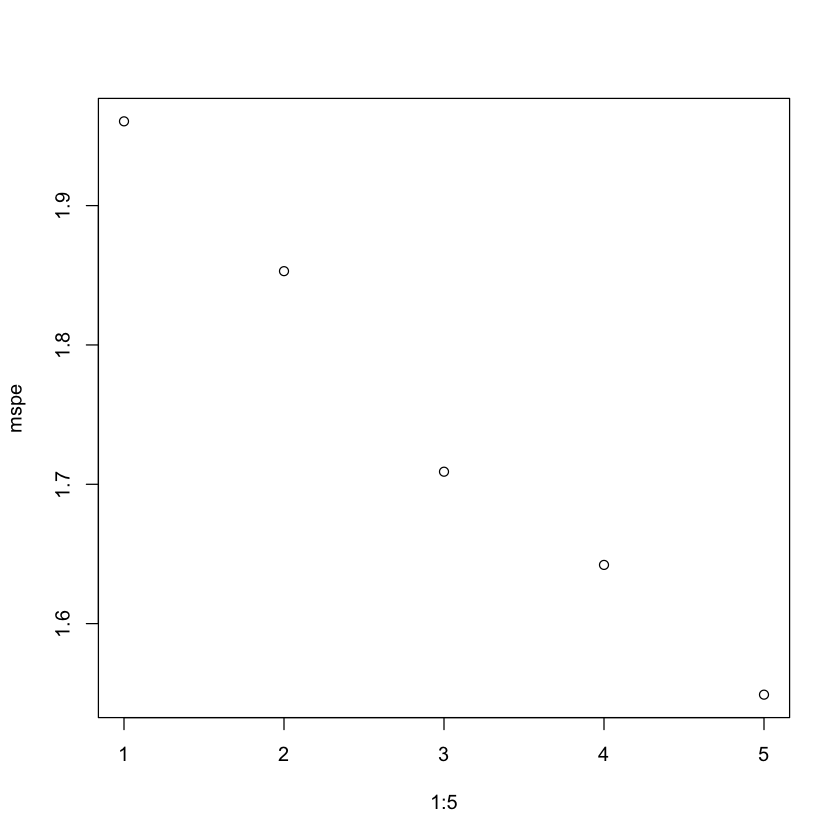

In [41]:
mspe = c(mspe1, mspe2, mspe3, mspe4, mspe5); #mspe/max(mspe)
which.min(mspe)
plot(1:5, mspe)


According to MSPE, best model is 

Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + 
    Compost_lbs + Paper_lbs + Wrap_it_Up_food_donation + Pallets + 
    Specials + Attendance + Trash_lbs

(Intercept),Cardboard_lbs,Cans_Bottles_lbs,Compost_lbs,Paper_lbs,Fryer_Grease,Wrap_it_Up_food_donation,Pallets,Specials,Attendance,Trash_lbs
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE


Warning message in 2 * (2:12) + n * log(rs$rss/n):
“longer object length is not a multiple of shorter object length”

[1] 6

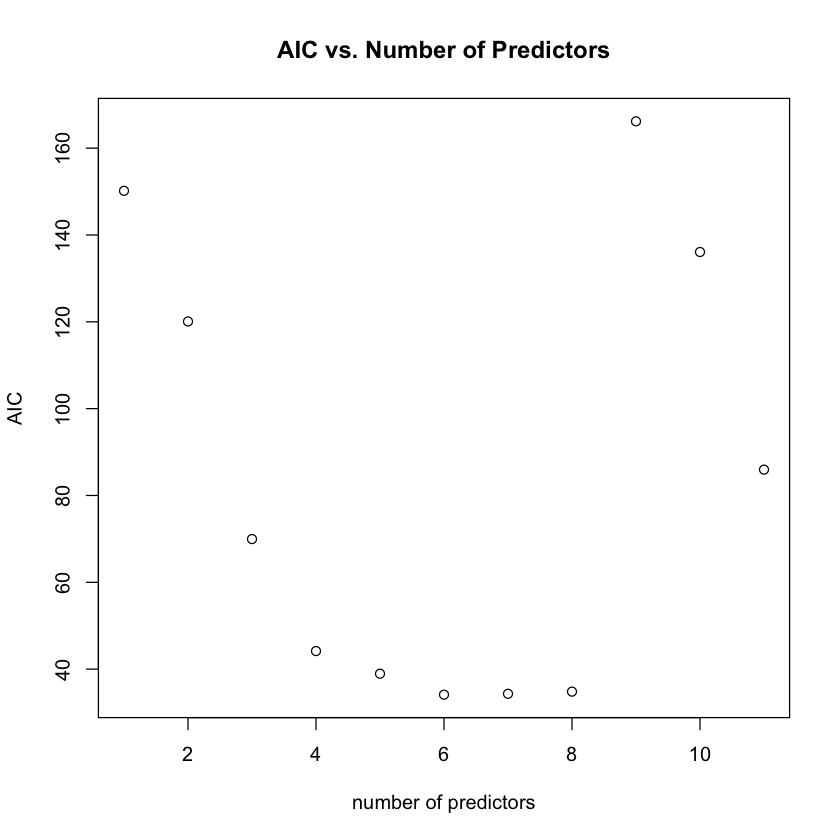

In [42]:


n = dim(train)[1]; 
reg1 = regsubsets(Diversion_Rate ~ ., data = train)
rs = summary(reg1)
rs$which

AIC = 2*(2:12) + n*log(rs$rss/n) 
which.min(AIC)
plot(AIC ~ I(1:11), xlab = "number of predictors", ylab = "AIC", main = "AIC vs. Number of Predictors")

[1] 8

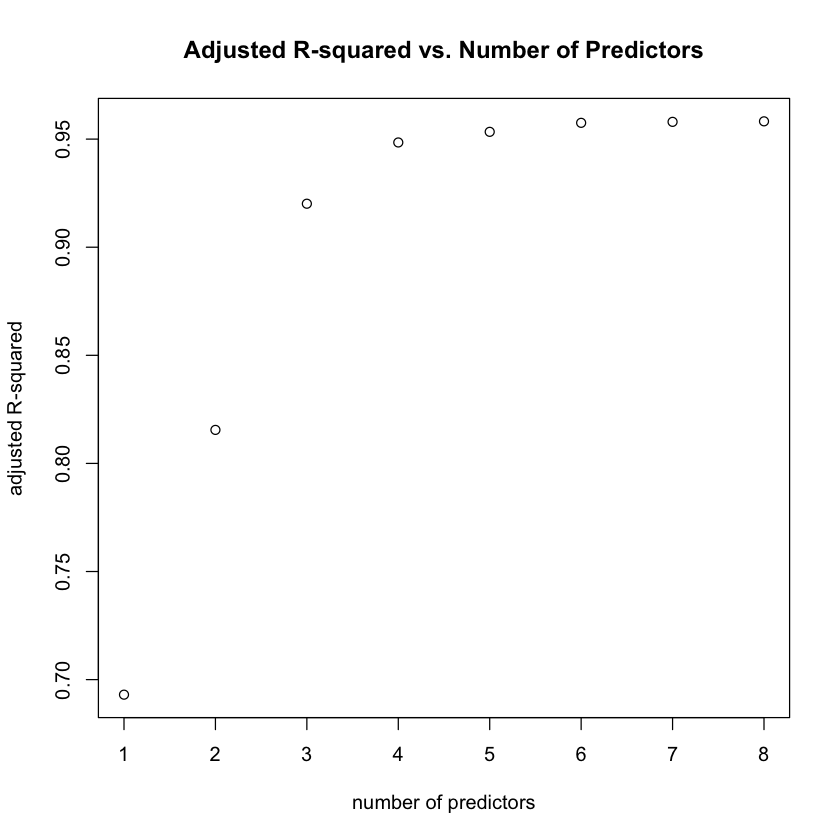

In [43]:
which.max(rs$adjr2)
plot(1:8, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared", main = "Adjusted R-squared vs. Number of Predictors")

Warning message in log(n) * (2:12) + n * log(rs$rss/n):
“longer object length is not a multiple of shorter object length”

[1] 6

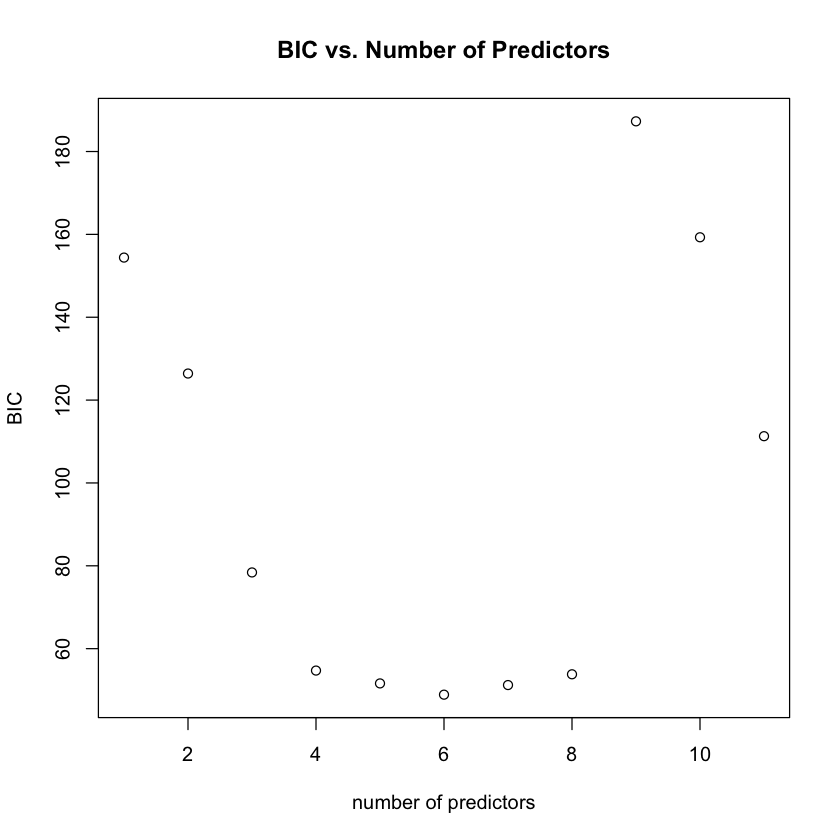

In [44]:
BIC = log(n)*(2:12) + n*log(rs$rss/n) 
which.min(BIC)
plot(BIC ~ I(1:11), xlab = "number of predictors", ylab = "BIC",  main = "BIC vs. Number of Predictors")

According to AIC & BIC, the best model is given by 

           Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Trash_lbs
           
           
According to Adjusted R-squared, the best model is given by 

           Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Trash_lbs + Wrap_it_Up_food_donation + Attendance

In [45]:
lmod_div_reduced = lm(Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Trash_lbs, data = train)

lmod_div_R_Sqred = lm(Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Trash_lbs + Wrap_it_Up_food_donation + Attendance, data = train)

lmod_div_full = lm(Diversion_Rate ~ ., data = train)

In [46]:
anova(lmod_div_reduced, lmod_div_full)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
54,84.83547,NA,NA,NA,NA
50,79.58389,4,5.251575,0.8248489,0.5156087


In this case, the p-value is relatively large, indicating that the additional variables in the full model do not significantly improve the model fit compared to the reduced model. So the reduced model is suffice when compared with full model.

In [47]:
anova(lmod_div_R_Sqred, lmod_div_full)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
52,80.36418,NA,NA,NA,NA
50,79.58389,2,0.7802835,0.2451135,0.7835506


In this case, the p-value is relatively large, indicating that the additional variables in the full model do not significantly improve the model fit compared to the model with highest R-squared value. So the reduced model is suffice when compared with full model.

In [48]:
anova(lmod_div_reduced, lmod_div_R_Sqred)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
54,84.83547,NA,NA,NA,NA
52,80.36418,2,4.471291,1.446585,0.2446871


In this case, the p-value is relatively large, indicating that the additional variables in the full model do not significantly improve the model fit compared to the reduced model. So the reduced model is suffice when compared with model with highest R-squared value.

In [49]:
vif_AIC_BIC_MSPE = vif(lm(Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Trash_lbs, data = train))

vif_Adj_Sqr = vif(lm(Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Trash_lbs + Wrap_it_Up_food_donation + Attendance, data = train))

vif_AIC_BIC_MSPE

vif_Adj_Sqr

Cardboard_lbs Cans_Bottles_lbs      Compost_lbs        Paper_lbs 
        2.177485         1.499088         1.550682         1.068183 
         Pallets        Trash_lbs 
        2.096794         1.385442

Cardboard_lbs         Cans_Bottles_lbs              Compost_lbs 
                2.682998                 2.106494                 1.626099 
               Paper_lbs                  Pallets                Trash_lbs 
                1.215289                 2.703097                 1.478239 
Wrap_it_Up_food_donation               Attendance 
                1.750951                 1.912501

None of the parameters in the best model are having multi-collinearity among themselves. Since Ridge regression is a type of regularized linear regression technique that is used when dealing with multicollinearity, which is a situation where predictor variables in a regression model are highly correlated with each other, it won't be applicable for this dataset.

In [50]:
pglm_model = glm(Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Trash_lbs, data = train, family = "poisson")
summary(pglm_model)

pred = predict(pglm_model, newdata = test, type = "response")
mspe = mean((test$Diversion_Rate - pred)^2)
cat("The MSPE for the Poisson regression model is", round(mspe, 2), "\n")

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 90.188343”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 86.020239”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 87.536116”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 77.711836”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 83.128732”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 71.750000”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 83.534896”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 74.662075”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 85.344443”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 75.638559”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 85.130472”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 84.509380”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 78.408980”Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 86


Call:
glm(formula = Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + 
    Compost_lbs + Paper_lbs + Pallets + Trash_lbs, family = "poisson", 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.37826  -0.06562  -0.00019   0.07126   0.32563  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       4.455e+00  7.038e-02  63.294  < 2e-16 ***
Cardboard_lbs     9.915e-06  2.753e-05   0.360    0.719    
Cans_Bottles_lbs  1.662e-05  1.386e-05   1.199    0.230    
Compost_lbs       1.357e-05  8.265e-06   1.642    0.101    
Paper_lbs        -3.563e-05  8.465e-05  -0.421    0.674    
Pallets           1.971e-05  4.457e-05   0.442    0.658    
Trash_lbs        -7.968e-05  1.811e-05  -4.399 1.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 27.6645  on 60  degrees of freedom
Residual deviance:  1.0436  on 54  deg

The MSPE for the Poisson regression model is 1.33 


This regression model is not appropriate for this dataset since poisson regression is used for count or frequency response variables that have a Poisson distribution.

So the best model is Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + 
    Compost_lbs + Paper_lbs + Pallets + Trash_lbs

In [51]:
lmod_div = lm(Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Trash_lbs, data = train)

summary(lmod_div)


Call:
lm(formula = Diversion_Rate ~ Cardboard_lbs + Cans_Bottles_lbs + 
    Compost_lbs + Paper_lbs + Pallets + Trash_lbs, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1566 -0.5353 -0.0506  0.6097  3.1933 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.596e+01  8.096e-01 106.177  < 2e-16 ***
Cardboard_lbs     7.902e-04  3.125e-04   2.529  0.01440 *  
Cans_Bottles_lbs  1.356e-03  1.547e-04   8.767 5.83e-12 ***
Compost_lbs       1.086e-03  9.258e-05  11.730  < 2e-16 ***
Paper_lbs        -2.982e-03  9.443e-04  -3.158  0.00260 ** 
Pallets           1.516e-03  5.092e-04   2.978  0.00434 ** 
Trash_lbs        -6.339e-03  2.021e-04 -31.370  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.253 on 54 degrees of freedom
Multiple R-squared:  0.9618,	Adjusted R-squared:  0.9575 
F-statistic: 226.5 on 6 and 54 DF,  p-value: < 2.2e-16


In [52]:
ystar = predict(lmod_div, test); 
mspe = with(test, mean((Diversion_Rate - ystar)^2))
mspe

[1] 1.549018

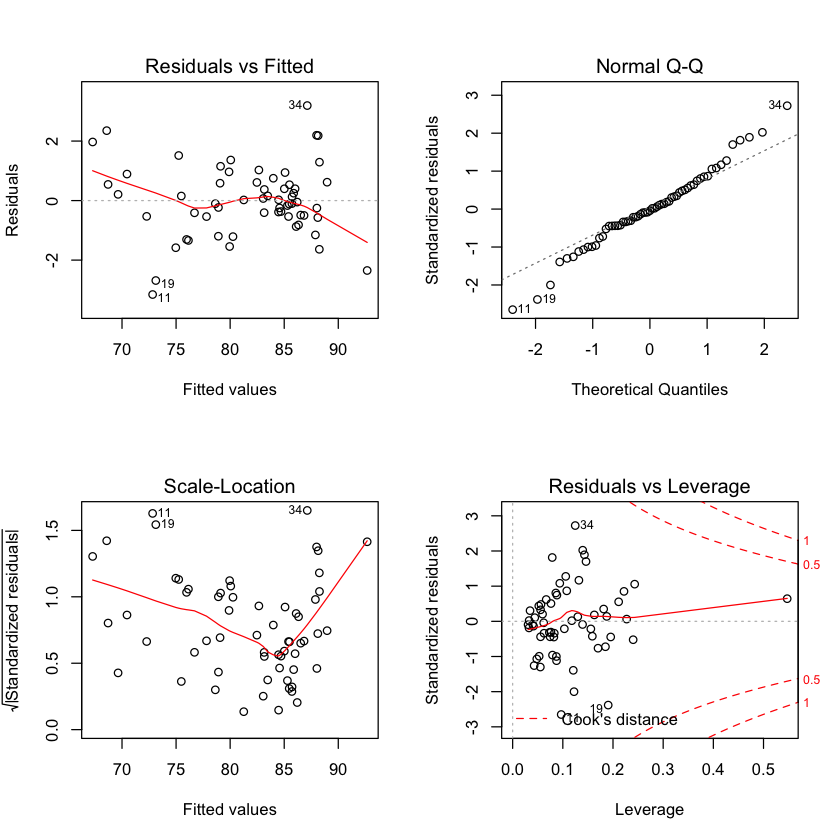

In [53]:
par(mfrow = c(2,2))
plot(lmod_div)

- From the fitted vs residuals plot, both linearity & homoscedasticity assumptions are met leaving out some corner observations.
- From the Q-Q plot, the residuals deviated at the tails from the normal distribution.

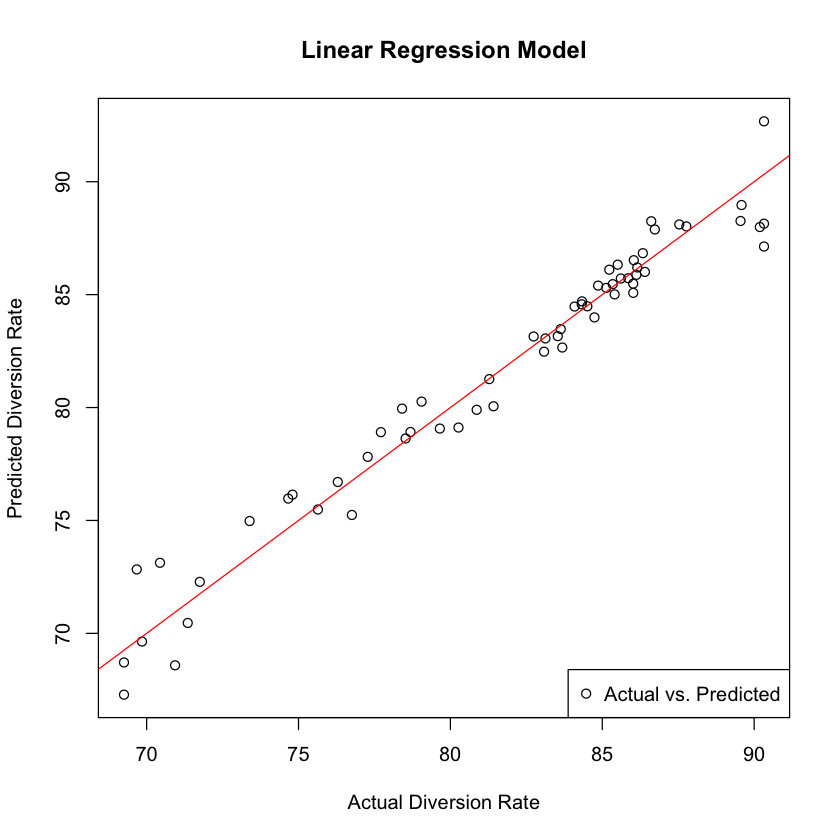

In [54]:
# Generate predicted values from the linear regression model
train_predicted <- predict(lmod_div)

# Create scatter plot of actual vs. predicted values
plot(train$Diversion_Rate, train_predicted, xlab = "Actual Diversion Rate", ylab = "Predicted Diversion Rate", main = "Linear Regression Model")

# Add a diagonal reference line for comparison
abline(0, 1, col = "red")

# Add a legend
legend("bottomright", legend = c("Actual vs. Predicted"), col = c("black"), pch = c(1))



#### Analysis on Trash

In [55]:
lmod_trash = lm(Trash_lbs ~ ., data = train)
summary(lmod_trash)


Call:
lm(formula = Trash_lbs ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-456.98 -111.71   -8.44   96.00  410.42 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.279e+04  4.662e+02  27.426  < 2e-16 ***
Cardboard_lbs             1.592e-01  5.448e-02   2.922  0.00521 ** 
Cans_Bottles_lbs          2.051e-01  2.677e-02   7.661 5.57e-10 ***
Compost_lbs               1.692e-01  1.620e-02  10.449 3.60e-14 ***
Paper_lbs                -5.466e-01  1.745e-01  -3.132  0.00290 ** 
Fryer_Grease              1.025e-01  2.283e-01   0.449  0.65528    
Wrap_it_Up_food_donation  6.097e-01  4.938e-01   1.235  0.22272    
Pallets                   2.202e-01  9.500e-02   2.318  0.02456 *  
Specials                  3.845e-01  6.892e-01   0.558  0.57940    
Attendance                5.266e-03  5.087e-03   1.035  0.30559    
Diversion_Rate           -1.514e+02  5.106e+00 -29.662  < 2e-16 ***
---
Signif. codes:  0 ‘***

(Intercept),Cardboard_lbs,Cans_Bottles_lbs,Compost_lbs,Paper_lbs,Fryer_Grease,Wrap_it_Up_food_donation,Pallets,Specials,Attendance,Diversion_Rate
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE


Warning message in 2 * (2:12) + n * log(rs_trash$rss/n):
“longer object length is not a multiple of shorter object length”

[1] 6

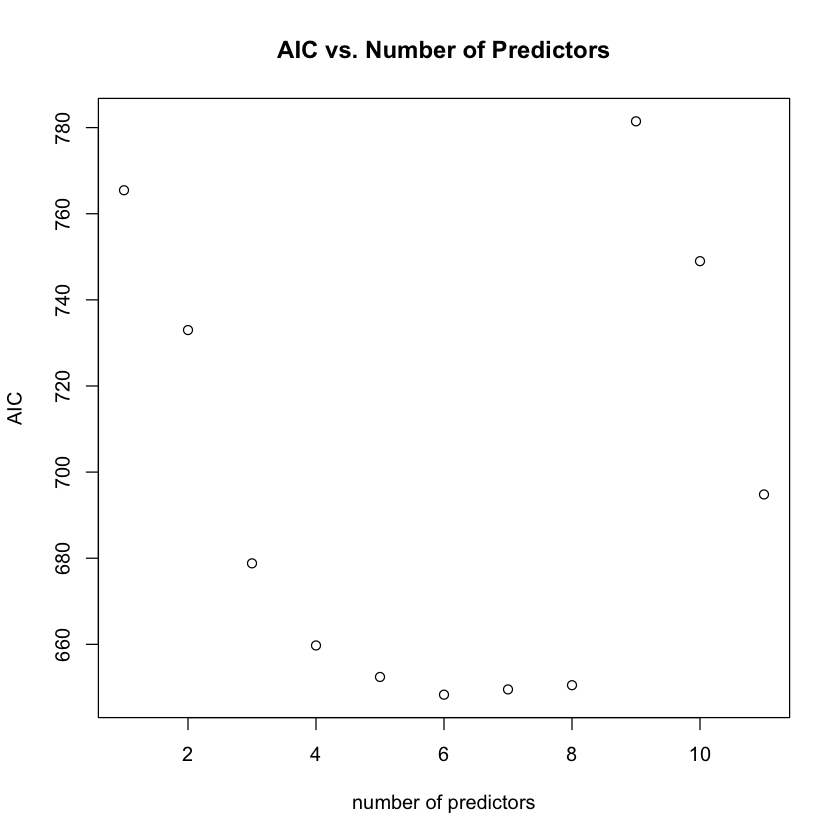

In [56]:
n = dim(train)[1]; 
reg1_trash = regsubsets(Trash_lbs ~ ., data = train)
rs_trash = summary(reg1_trash)
rs_trash$which

AIC_trash = 2*(2:12) + n*log(rs_trash$rss/n) 
which.min(AIC)
plot(AIC_trash ~ I(1:11), xlab = "number of predictors", ylab = "AIC", main = "AIC vs. Number of Predictors")

[1] 6

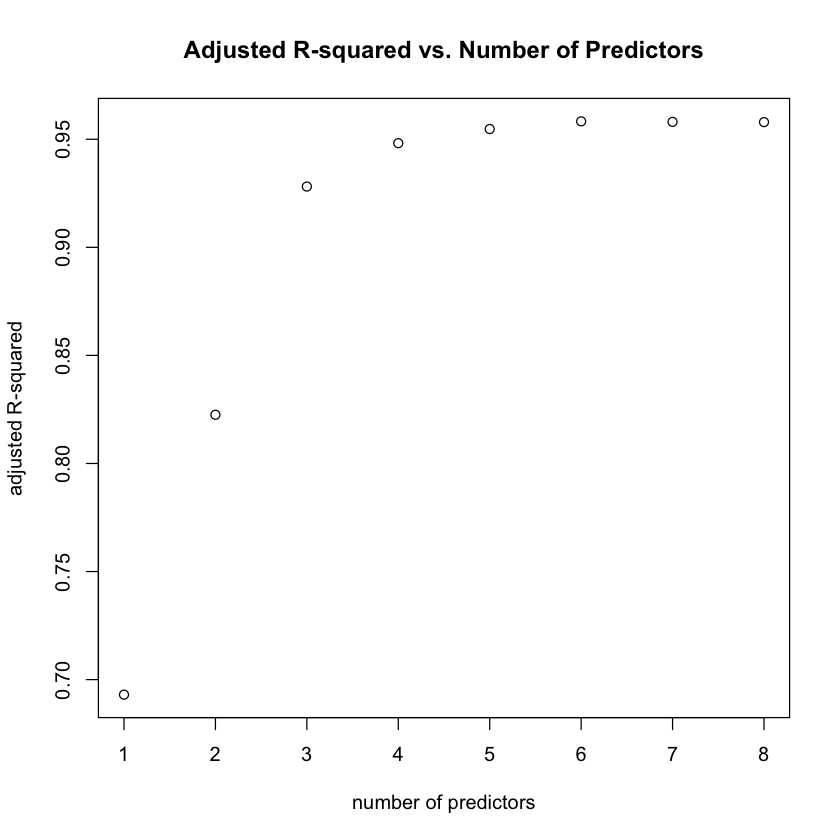

In [57]:
which.max(rs_trash$adjr2)
plot(1:8, rs_trash$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared", main = "Adjusted R-squared vs. Number of Predictors")

Warning message in log(n) * (2:12) + n * log(rs_trash$rss/n):
“longer object length is not a multiple of shorter object length”

[1] 6

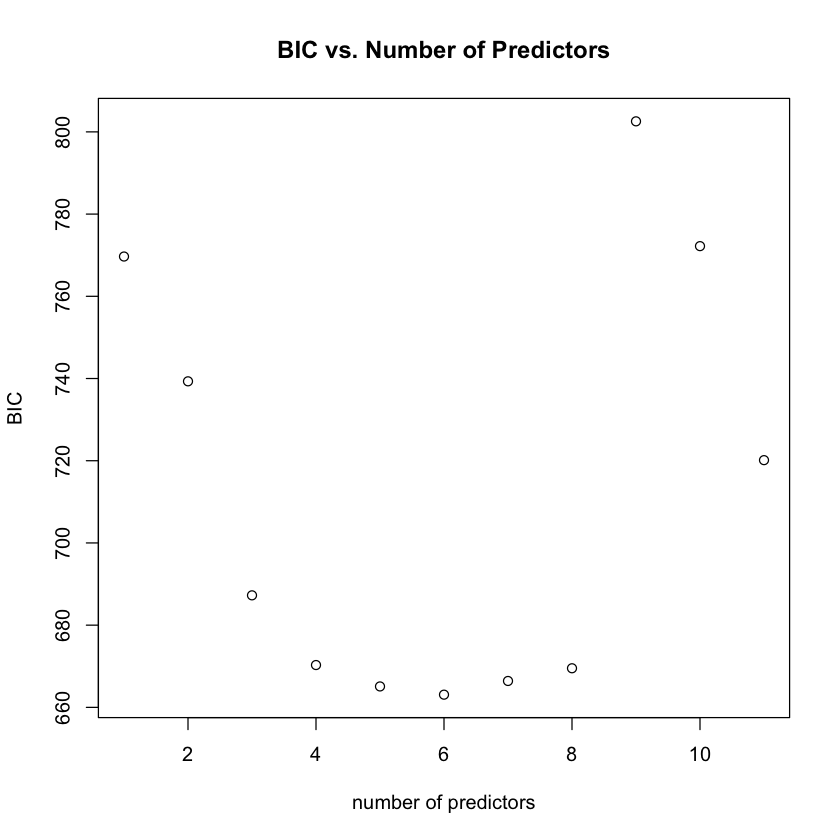

In [58]:
BIC_trash = log(n)*(2:12) + n*log(rs_trash$rss/n) 
which.min(BIC_trash)
plot(BIC_trash ~ I(1:11), xlab = "number of predictors", ylab = "BIC", main = "BIC vs. Number of Predictors")

According to AIC, BIC & Adjusted R-squared, the best model is

Trash_lbs ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Diversion_Rate

In [59]:
lmod_trash = lm(Trash_lbs ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + Paper_lbs + Pallets + Diversion_Rate, data = train)
summary(lmod_trash)


Call:
lm(formula = Trash_lbs ~ Cardboard_lbs + Cans_Bottles_lbs + Compost_lbs + 
    Paper_lbs + Pallets + Diversion_Rate, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-434.77  -89.69  -22.49   98.31  436.10 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.291e+04  3.976e+02  32.470  < 2e-16 ***
Cardboard_lbs     1.308e-01  4.754e-02   2.752  0.00806 ** 
Cans_Bottles_lbs  2.220e-01  2.135e-02  10.395 1.70e-14 ***
Compost_lbs       1.664e-01  1.430e-02  11.639 2.43e-16 ***
Paper_lbs        -4.678e-01  1.445e-01  -3.238  0.00206 ** 
Pallets           1.915e-01  8.027e-02   2.386  0.02059 *  
Diversion_Rate   -1.496e+02  4.767e+00 -31.370  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 192.5 on 54 degrees of freedom
Multiple R-squared:  0.9625,	Adjusted R-squared:  0.9583 
F-statistic: 230.7 on 6 and 54 DF,  p-value: < 2.2e-16


In [60]:
ystar_trash = predict(lmod_div, test); 
mspe_trash = with(test, mean((Trash_lbs - ystar_trash)^2))
mspe_trash

[1] 5953762

In [61]:
# Assuming your test dataset is named "test"
std_dev <- sd(test$Trash_lbs)

# Print the standard deviation
print(std_dev)

[1] 992.1124


In [62]:
RMSPE <- sqrt(mspe_trash) / std_dev
RMSPE

[1] 2.459432

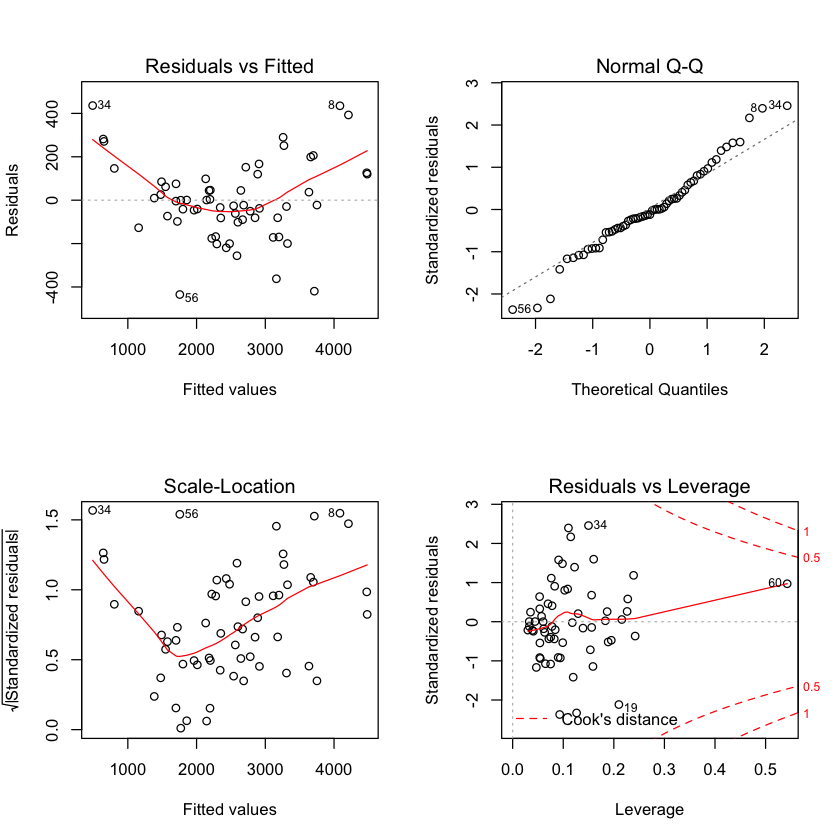

In [63]:
par(mfrow = c(2,2))
plot(lmod_trash)

$\beta_0$